In [47]:
# Imporing necessary modules

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Reading and visualizing our dataset

dataset = pd.read_csv('eta2Dataset.txt', sep = '\t')
print (dataset.head())

   eta1  eta2  eta3  eta4    u0      u1        u2        u3        u4
0     1  0.19     1     1 -0.99  0.9801  0.980019 -0.970219  0.960438
1     1  0.19     1     1 -0.95  0.9025  0.900495 -0.855470  0.810891
2     1  0.19     1     1 -0.90  0.8100  0.802067 -0.721860  0.643311
3     1  0.19     1     1 -0.85  0.7225  0.704861 -0.599132  0.496829
4     1  0.19     1     1 -0.80  0.6400  0.609049 -0.487240  0.370941


In [49]:
# eta1, eta2, eta3, and eta4 are the dimensionless number corresponding to the first neighbor, second neighbor, third neighbor,
# fourth neighbor cluster. 

# u0 is the composition.

# u1, u2, u3, and u4 are the correlation functions in the cluster variation method.

In [50]:
# Counting the number of different compositions in the dataset

dataset['u0'].value_counts()

 0.00    16
-0.70    16
-0.20    16
 0.90    16
 0.85    16
-0.75    16
-0.35    16
-0.50    16
-0.80    16
 0.20    16
 0.45    16
 0.35    16
 0.25    16
 0.60    16
 0.70    16
-0.99    16
-0.60    16
 0.75    16
 0.30    16
-0.05    16
 0.15    16
 0.10    16
 0.95    16
-0.10    16
-0.85    16
 0.80    16
 0.40    16
-0.65    16
-0.40    16
-0.90    16
 0.65    16
-0.15    16
-0.30    16
-0.25    16
 0.05    16
-0.55    16
 0.55    16
-0.45    16
 0.50    16
-0.95    16
Name: u0, dtype: int64

In [5]:
# Making input parameter by considering eta1, eta2, eta3, and eta4.
# We keep eta1, eta3, and eta4 constant and just vary eta2 values to keep this problem relatively simple.
# Further to make it more simple we take only composition (u0) as our target variable.
# This makes the problem a case of MANY-TO-ONE modeling.

# The objective of this exercise is to implement a regression model to predict composition values at different eta values.

In [51]:
# Extracting input parameters and target variable

xvalues = pd.DataFrame([dataset.eta1, dataset.eta2, dataset.eta3, dataset.eta4]).T
yvalues = pd.DataFrame([dataset.u0]).T

print (xvalues.shape)
print (yvalues.shape)

(640, 4)
(640, 1)


C:\Users\UAL-Laptop\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\UAL-Laptop\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


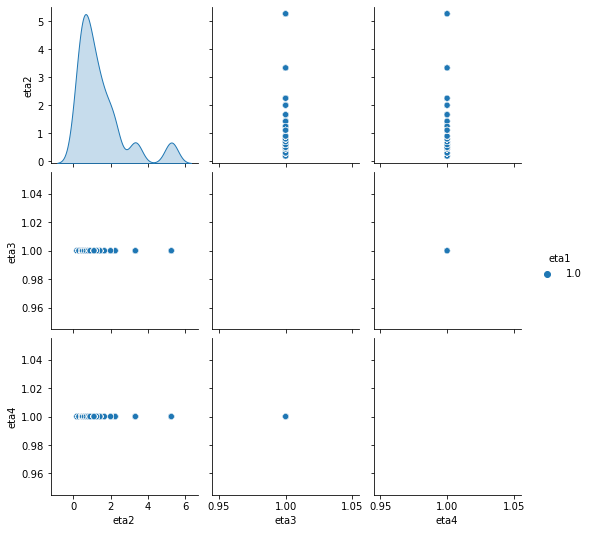

In [52]:
# This is the input data visualization part.
# Here we can observe that eta2 is highly correlated while eta1, eta2, and eta3 are relatively simple.

sns.pairplot(xvalues, hue = 'eta1')

In [53]:
# Separating our input parameters and target variable into training and testing datasets

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xvalues, yvalues, test_size = 0.20)
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)

(512, 4)
(512, 1)
(128, 4)
(128, 1)


In [54]:
# Applying a simple linear regression model on our training dataset

from sklearn import linear_model
from sklearn import metrics

lin = linear_model.LinearRegression()

lin.fit(xtrain, ytrain)

trainingPredictions = lin.predict(xtrain)

In [55]:
# Predicting the model efficiency on training dataset

print ('Linear model efficiency on training dataset')
print (metrics.mean_absolute_error(ytrain, trainingPredictions))

Linear model efficiency on training dataset
0.49599511221166914


In [56]:
# Predicting the model efficiency on testing dataset

testingPredictions = lin.predict(xtest)

print ('Linear model efficiency on testing dataset')
print (metrics.mean_absolute_error(ytest, testingPredictions))

Linear model efficiency on testing dataset
0.5161324633065145


In [57]:
# Using K-nearest neighbor on our training dataset

import math
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(xtrain, ytrain)
trainingPredictions = neigh.predict(xtrain)
mse = mean_squared_error(ytrain, trainingPredictions)

print (mse)

0.4842062011718751


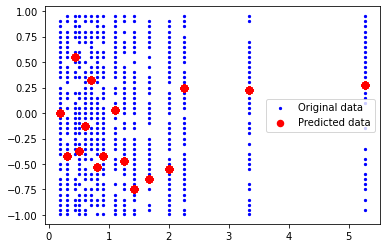

In [58]:
# Plotting input and predicted values by the K-nearest neighbor model

plt.scatter(xtrain['eta2'], ytrain, s = 5, color = 'blue', label = 'Original data')
plt.scatter(xtrain['eta2'], trainingPredictions, lw = 1.5, color = 'red', label = 'Predicted data')
plt.legend()

In [59]:
# Using K-nearest neighbor on our testing dataset

neigh = KNeighborsRegressor(n_neighbors = 2)
neigh.fit(xtest, ytest)
testingPredictions = neigh.predict(xtest)
mse = mean_squared_error(ytest, testingPredictions)
print (mse)

0.43525468749999996


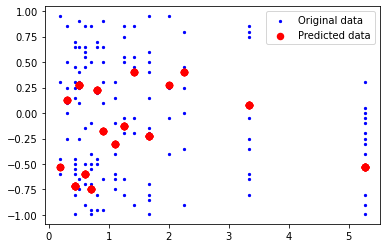

In [60]:
# Plotting inpudata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYIAAAD4CAYAAADhNOGaAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAApyElEQVR4nO3de5QV1Z3o8e/PRqYVjC9aBBoCYTAReTYNjFFQARmRGERFwVzAWUnwheNMMibePEYTNcuMyXXGBygmjpALcUTkanxHHgOKDxrCU6+AiNcWlE6rCEEj3f27f1Sd9nD6PLuqzqlT9fus1et07dpVtevU6bO79q/23qKqGGOMia8jSl0AY4wxpWUVgTHGxJxVBMYYE3NWERhjTMxZRWCMMTHXodQFaI8uXbpo7969S10MY4wpK+vWrfuzqlalppdlRdC7d2/q6upKXQxjjCkrIvJOunRfmoZE5EER2SsiWzKsFxG5S0R2iMgmEalJWneeiLzprrvRj/IYY4zJn18xgoeA87KsnwD0c39mAXMBRKQCuNdd3x+YJiL9fSqTMcaYPPhSEajqKuDDLFkmAQvU8QpwnIh0A0YAO1R1p6p+Djzs5jXGGFMkxYoR9ADeTVqud9PSpY9MtwMRmYVzN0GvXr2CKaUxJq1Dhw5RX1/PZ599VuqimDxUVlZSXV3NkUcemVf+YlUEkiZNs6S3TVSdB8wDqK2ttQGSjCmi+vp6jjnmGHr37o1Iuj9bExaqSmNjI/X19fTp0yevbYrVj6Ae6Jm0XA3szpJujAmRzz77jBNPPNEqgTIgIpx44okF3b0VqyJ4ApjhPj30d8A+Vd0DrAX6iUgfEekITHXzBqKlBT74AGzA1eD4/R7bNQsPqwTKR6HXyq/HR38PvAx8VUTqReTbInKViFzlZnka2AnsAB4ArgFQ1SZgNvAc8AbwiKpu9aNMqVpa4JxzoLoazj7bWTb+8vs9tmtmTHH49dTQNFXtpqpHqmq1qv5WVe9T1fvc9aqq16pqX1UdqKp1Sds+raqnuOtu86M86TQ0wJo10NTkvDY0BHWk+PL7PbZrZpLV19czadIk+vXrR9++fbn++uv5/PPP0+bdvXs3l1xySc59nn/++Xz88cftKs/NN9/Mr371q5z5OnfunHX9xx9/zJw5c9pVBr/EZqyhk06Cr38dOnRwXk86qdQlih6/32O7ZiZBVbnooou48MIL2b59O9u2bePAgQP8+Mc/bpO3qamJ7t278+ijj+bc79NPP81xxx0XQInzZxVBEYnAihVQXw8rVzrLxl9+v8d2zUzC8uXLqays5B/+4R8AqKio4M477+TBBx/k4MGDPPTQQ0yZMoULLriA8ePHs2vXLgYMGADAwYMHufTSSxk0aBCXXXYZI0eObB2ipnfv3vz5z39m165dnHrqqXz3u9/ltNNOY/z48Xz66acAPPDAAwwfPpzBgwdz8cUXc/Dgwaxlffvttzn99NMZPnw4P/3pT1vTDxw4wNixY6mpqWHgwIE8/vjjANx444289dZbDBkyhBtuuCFjviDFpiIAOOII6NrVny+UoIOY5Rok9fM9DmJ/pnj8/Axv3bqVYcOGHZb2pS99iV69erFjxw4AXn75ZebPn8/y5csPyzdnzhyOP/54Nm3axE9/+lPWrVuX9hjbt2/n2muvZevWrRx33HEsWbIEgIsuuoi1a9eyceNGTj31VH77299mLev111/P1Vdfzdq1azn55JNb0ysrK1m6dCnr169nxYoVfP/730dVuf322+nbty8bNmzgjjvuyJgvSLGqCPwSdBDTgqSm3Pn9GVbVtE/CJKefe+65nHDCCW3yvPjii0ydOhWAAQMGMGjQoLTH6NOnD0OGDAFg2LBh7Nq1C4AtW7YwatQoBg4cyMKFC9m6NfvzLC+99BLTpk0DYPr06YeV9Uc/+hGDBg1i3LhxvPfee3zwwQdpzymffH6yiqAdgg5iWpDUlDu/P8OnnXZamxGHP/nkE95991369u0LQKdOndJum+9/03/zN3/T+ntFRQVNTU0AXHHFFdxzzz1s3ryZm266Ka/n89NVWgsXLqShoYF169axYcMGunbtmnZf+ebzk1UE7RB0ENOCpKbc+f0ZHjt2LAcPHmTBggUANDc38/3vf58rrriCo48+Ouu2Z555Jo888ggAr7/+Ops3by7o2Pv376dbt24cOnSIhQsX5sx/xhln8PDDDwMcln/fvn2cdNJJHHnkkaxYsYJ33nFGhD7mmGPYv39/znxBsoqgHYIOYlqQ1JQ7/x8cEJYuXcrixYvp168fp5xyCpWVlfziF7/Iue0111xDQ0MDgwYN4pe//CWDBg3i2GOPzfvYt9xyCyNHjuTcc8/la1/7Ws78//Ef/8G9997L8OHD2bdvX2v6t771Lerq6qitrWXhwoWt+zrxxBM544wzGDBgADfccEPGfEGSoIMQQaitrVW/J6ZpaXFuX086yduHNtN+/Nq/F/mWIQxlNf7w61q+8cYbnHrqqf4VrIiam5s5dOgQlZWVvPXWW4wdO5Zt27bRsWPHUhctUOmumYisU9Xa1Lx2R4B/ga1M+wlD8DffMoShrMYfdi0dBw8e5Mwzz2Tw4MFMnjyZuXPnRr4SKJTdEeA84lZd7QS2OnRwbme7dvVvP37t34t8yxCGshp/+Hkty/mOIK7sjqBAfgW2Mu0nDMHffMsQhrIaf9i1NPkqy8nr/ZYIbHltS820H7/270W+ZQhDWY0/7FqafFlF4Er0YA1qP37t34t8yxCGshp/2LU0+bCmIRNZ5TpMh5/sPTD5sIrARJI9MRO996CiooIhQ4YwYMAApkyZknPwt2yuuOKK1tFJv/Od7/D6669nzLty5UrWrFlT8DESA9pl89BDDzF79uysedp7/EJYRWAiyYbpCMF7sHs3rF7tvPrgqKOOYsOGDWzZsoWOHTty3333Hba+ubm5Xfv9zW9+Q//+/TOuL8YXcTZlUxGIyHki8qaI7BCRG9Osv0FENrg/W0SkWUROcNftEpHN7jp/e4mZ2LInZkr4Hhw4ANOmQc+eMHq08zptmpPuk1GjRrFjxw5WrlzJOeecw+WXX87AgQNpbm7mhhtuYPjw4QwaNIj7778fcMYbmj17Nv3792fixIns3bu3dV9nn3126zhGzz77LDU1NQwePJixY8eya9cu7rvvPu68806GDBnC6tWraWho4OKLL2b48OEMHz6cl156CYDGxkbGjx/P0KFDufLKKzOOcfSf//mfnHLKKZx11lmt2wL84Q9/YOTIkQwdOpRx48bxwQcfpD1+unyeqaqnH6ACeAv4CtAR2Aj0z5L/AmB50vIuoEshxxw2bJgak0tzs+r776u2tJS6JKXj13vw+uuv55956lRVJyxx+M/UqZ7K0KlTJ1VVPXTokH7zm9/UOXPm6IoVK/Too4/WnTt3qqrq/fffr7fccouqqn722Wc6bNgw3blzpy5ZskTHjRunTU1N+t577+mxxx6rixcvVlXVs846S9euXat79+7V6urq1n01NjaqqupNN92kd9xxR2s5pk2bpqtXr1ZV1XfeeUe/9rWvqarqddddpz/72c9UVfXJJ59UQBsaGg47h927d2vPnj117969+te//lW//vWv67XXXquqqh9++KG2uBfqgQce0O9973tpj58pX6p01wyo0zTfqX48NTQC2KGqOwFE5GFgEpCp0W0a8HsfjmsKFLehI+yJmRLYvRvcAd7aeOQR+PWvoXv3du36008/bR0metSoUXz7299mzZo1jBgxgj59+gDw/PPPs2nTptb2/3379rF9+3ZWrVrFtGnTqKiooHv37owZM6bN/l955RVGjx7duq90Q1oDvPDCC4fFFD755BP279/PqlWreOyxxwCYOHEixx9/fJttX331Vc4++2yqqqoAuOyyy9i2bRvgTMV52WWXsWfPHj7//PPWcqTKN18h/Gga6gG8m7Rc76a1ISJHA+cBS5KSFXheRNaJyCwfymPSiFrg0ORWkmv+1lvZxy/ZubPdu07ECDZs2MDdd9/dOkxE8vDTqsrdd9/dmu/tt99m/PjxQPqhoZNphjkP2p5GCy+//HLrMd577z2OOeaYvI6RLc91113H7Nmz2bx5M/fff3/GoafzzVcIPyqCdGeV6WG1C4CXVPXDpLQzVLUGmABcKyKj0x5EZJaI1IlIXUMcI38elTxwaIquJNe8b1/nViydI46Ar3wl0MP//d//PXPnzuXQoUMAbNu2jb/85S+MHj2ahx9+mObmZvbs2cOKFSvabHv66afz3//937z99tsAfPih8zWVOkz0+PHjueeee1qXN2zYAMDo0aNbh51+5pln+Oijj9ocY+TIkaxcuZLGxkYOHTrE4sWLW9ft27ePHj2c/6Hnz5/fmp5umOp0+bzwoyKoB3omLVcDmR4TmEpKs5Cq7nZf9wJLcZqa2lDVeapaq6q1idsqkz8LnsZPSa559+5w6aXp1116abubhfL1ne98h/79+1NTU8OAAQO48soraWpqYvLkyfTr14+BAwdy9dVXc9ZZZ7XZtqqqinnz5nHRRRcxePBgLrvsMgAuuOACli5d2hqsveuuu6irq2PQoEH079+/9emlm266iVWrVlFTU8Pzzz9Pr1692hyjW7du3HzzzZx++umMGzeOmpqa1nU333wzU6ZMYdSoUXTp0qU1PfX4mfJ54XnQORHpAGwDxgLvAWuBy1V1a0q+Y4G3gZ6q+hc3rRNwhKrud3//I/BzVX022zGDGIY6DuIWIzAlGob6wAH47nedmEBLi3MncOml8MAD0Llz+wthClLIoHOeg8Wq2iQis4HncJ4gelBVt4rIVe76xMO+k4HnE5WAqyuw1G0z6wAsylUJlEpQX6LF/HK24Gn8lOSad+4Mv/+9ExjeudNpDgr4TsB448tYQ6r6NPB0Stp9KcsPAQ+lpO0EBvtRhiAlgm5r1ji32CtWZG4GDcN+jQmF7t2tAigT9rWTh6CCbhbANeXEazOyKZ5Cr5VVBHkIKuhmAVxTLiorK2lsbLTKoAyoKo2NjVRWVua9jQ1DnYegxnW38eJNuaiurqa+vh57dLs8VFZWUl1dnXd+qwjaKehJ6u0JHxMmRx55pC89WE04WdNQHlJ7aDY1+TNJfZgnuzfGxIdNXp+H1EnA//QnGDrU+yT1YZ7s3hgTPTZ5vQepQd3+/f2ZpD7Mk90bY+LD7gjylNpm71eMIOhYgzHGJNgdgUeJHpqJL+XUZb/2mys97GyOXGPKj1UEPop7kDfu529MubKKwEdx7ykc9/M3plxZReCjuAd5437+xpQr61Dmo7j3FI77+RtTruyOIEbyDeR6CfiWa5DbmDizisBHYQ6W5lu2MJ+DMSYYVhH4KMzB0nzLFuZzMMYEwyoCH4U5WJpv2cJ8DsaYYPhSEYjIeSLypojsEJEb06w/W0T2icgG9+df8922nCSCpfX1sHJluNrJ8y1bmM/BGBMMzxWBiFQA9wITgP7ANBHpnybralUd4v78vMBtA+dXj9hMwdJC91/KHrpeAr7Ws9iY8uPHHcEIYIeq7lTVz4GHgUlF2NY3QQdI/RqeuphlCOsxjDH+86Mi6AG8m7Rc76alOl1ENorIMyJyWoHbIiKzRKROROr8niUp6ABpofsPojzFCAJboNmY8uRHRZCuASG1YWA98GVVHQzcDfyfArZ1ElXnqWqtqtZWVVW1t6xpBR0g9Wt46mKWIazHMMb4z4+exfVAz6TlamB3cgZV/STp96dFZI6IdMln22IIukdsofsPojzF6PVrPYuNKU9+3BGsBfqJSB8R6QhMBZ5IziAiJ4s4XwsiMsI9bmM+2xZLrgCp1165hQZgg+ihm+8+o9Kz2ALXxuTHc0Wgqk3AbOA54A3gEVXdKiJXichVbrZLgC0ishG4C5iqjrTbei2T3+LUKzcK5wDROQ9jisFmKMtDvnMIR2Gu4SicA0TnPIzxk81Q5kGceuWedBLc3eM26hjC3T1uK8tzgOichzHFYHcEecp3DuGynmt4+XIYOxbFeZwr8cqyZTBmTEmLVpConIcxPst0R2AVQTuV9Rd+JtlOJM/PSSjeFx/Ow5gosqYhH0UyEHnbbd7WE5L3xYfzMCZurCJoh0j2oF28OPv6JUty7iIU74sP52FM3FhF0A5RCAq3MWVK9vUXX5xzF6F4X3w4D2PixmIE7RSKtnC/WYzAmEizGIHPwtSD1jfLlhWWnkYo3hcfzsOYOLGKwHxhzBjnP+Zbb4WhQ51X1fJ75DIq52FMkVjTkDHGxIQ1DRljjEnLKgJjjIm5WFUEXoYlTt026CGOy2mOY2NMcQT1dx6bisBLr9fUbZua4KmTZ8LJXXiy68xIznEcGosWOX0DFi0qdUmMKakg/85jEyz2Mixx8rZT+R2LmAF8MaAZgCxYANOnF1Qmv8oaySGXN22Cmhpobv4iraIC1q+HQYNKVy5jSsSPv/PYB4u99HpN3ja5Ekh+ZcaMkpU1FD16/ZZaCYCzXFNTmvIYU2JB/p37UhGIyHki8qaI7BCRG9Os/5aIbHJ/1ojI4KR1u0Rks4hsEJHAnglNzKdbXw8rVxbW4Smx7UeTZzrLqesTv8yc6UNJCy+rl3MLpUWL2lYCCc3N1kxkYinIv3PPFYGIVAD3AhOA/sA0Eemfku1t4CxVHQTcAsxLWX+Oqg5Jd8viJy+9Xo84Ajovf6pNJXCYZ55pb9HSHq/UcxyXzNKl2dc//nhxymFMyAT1d+7HHcEIYIeq7lTVz4GHgUnJGVR1jap+5C6+AlT7cFxf5YrGt7TAgTETyRpRmTCh8ONecw1N3Xqg11xT8LaRNXly9vWTJmVf77InqYzJjx8VQQ/g3aTlejctk28Dyf86K/C8iKwTkVk+lKdguaLxifXHL50P0KYyaF2ePz//gz76KCqCzJ1Lh/d3w9y5qAg8+mg7zyJCLr8cKirSv88VFc76HCL9JJUxPvOjIkh3k5L2fzAROQenIvhhUvIZqlqD07R0rYiMzrDtLBGpE5G6Bp8Hus81jn7y+stZAHxxgq0numBBYQd1h0tuE3TONYxyXKxfD0dUHP4+H+E+NZSHUMyNYEyZ8KMiqAd6Ji1XA7tTM4nIIOA3wCRVbUykq+pu93UvsBSnqakNVZ2nqrWqWltVVeVDsb+QKxqfvH736Olos/Jk1Qzep4onq2ZAixb26KjbDJQx6GzNRM4jok1N/PyrC/kvLuXnX13ofKvn+ehoJJ+kMiYgnvsRiEgHYBswFngPWAtcrqpbk/L0ApYDM1R1TVJ6J+AIVd3v/v5H4Oeq+my2YwYx6FyucfRT13sad79HD9jdpq78QnU1vPtu5vUx4uV9DsXcCMaESGD9CFS1CZgNPAe8ATyiqltF5CoRucrN9q/AicCclMdEuwIvishG4DXgqVyVQFByReNT13uK3ucKdl5wQTt2Gk1en/SKzJNUxgQoNj2LQ0cE5fDmodblMrwmxpjwi33P4tBxJ1lvE3TONfm6Mcb4zCqCUrnkEmhRHj35at6hmkdPvtoJOl9ySalLZoyJmQ6lLkCcicDF782hoWEOl1hA0xhTInZHkHDbbTBkiPOaRmDjgPsU0AxLL9qwlMMYkz+rCJYvd76Ff/IT2LjReRVx0l1h76UalvKFpRzGmMLYU0PZ/hV335uwj/cflvKFpRzGmPTsqaF0MjQDpa4Pey/VsJQvLOUwxhQm3ncEQ4Y4zUGZDB3aOrZN2HuphqV8YSmHMaYtuyNIJ9cAbxdf3PpralA3bJPXh6UXbVjKYVwzZ0KXLr5NmmSiKd4VwY9/DGQZVtpdnyrooKgFXY1nv/udUxsvWACNjc6riJNuTIp4VwQAy5YBaXr4uunpBD3EsQ2hbDzLNIe2j3Nrm+iwimDMGGhR7v/yrdQxlPu/fKvTw3fMmIybBB0UtaCr8SRXM5A1E5kU8Q4WJyk0yBl0UNSCrqbdunRxmoMyqaqCvXuLVx4TGhYsziFsk8Vb0NW028SJ2de3Y25tEw6BjXDg7+6MMSWXa+7sQubWNqER5EMkVhEYE0WZ5tAudG5tExpBPkRiFYExUTR9utN+MGOGExOYMcNZLmRubRMqQT5E4ktFICLnicibIrJDRG5Ms15E5C53/SYRqcl3W2OMB/PnO4Fhaw4qeyKwYoUzhtfKlf7GDz1XBCJSAdwLTAD6A9NEpH9KtglAP/dnFjC3gG2LwoZPjh67psbkx487ghHADlXdqaqfAw8DqbOzTwIWqOMV4DgR6ZbntoGznrzRY9fURE3Yg8U9gHeTluvdtHzy5LMtACIyS0TqRKSuweeuttaTN3rsmpqoCXuwOF1LVerNeKY8+WzrJKrOU9VaVa2tqqoqsIjZWU/e6LFraqImyM+0H3MW1wM9k5argd155umYx7aBSwRhrCdvdNg1NVET5GfajzuCtUA/EekjIh2BqcATKXmeAGa4Tw/9HbBPVffkuW1RxKEnb77B0zAFWb2UJQ7XNJcwXUsTXp4rAlVtAmYDzwFvAI+o6lYRuUpErnKzPQ3sBHYADwDXZNvWa5lMW/kGmsIUZA1TWcqRvX/REuT1tEHnYiLf+YTDNO9wmMpSjuz9ixY/rqcNOhdz+QaawhRkDVNZypG9f9ES5PW0O4IYyXdo6zANgR2mspQje/+ixev1tDuCEgvDHMf5Bk/DFGQNU1nKkb1/Jh9WERRBaOY4vuYa6NHDeTXGlBULFqcot6ahoIN2Off/6KMwZUrbDRcvhksu8a8gxpjAWLC4zJV8juN0lUC2dGNM6IS9Z7HJIeherln3n6sZ6JprYM4cfwtkjPFd2HsWmySZgrYlm+P48cezb/iHP/haDuvJakxwgvoesYrAR74Gc374Q/jbv3VevZiUY1TvCy7wtv8k1pPVmPJkwWIf+RIUfuop+MY32qY/+SRMnNi+gmX798HH6289WY0JNwsWF4EvwZx0lUC29HwsXlxYejtZT1ZjypNVBD7yPKdormag9jYTXXKJ85//1Vc7/7JffbWz7POjo0HOqWqMCY5VBD7zFMxZsiT7+qVL21WmhJZ75vBB3bvovdmfErKArzHhFNTfplUEYXLxxdnXT57c7l0XYxjqlhZYfeI3OOrkTqw64RsWLDbGR9azOEVYg8W+CCiwG/gw1Hffjf7jPwLO/KOJkspdd8F117W73MYYh/UsjpMnnywsPU+BD0OdVAkkvybSjTHeBPkwhqeKQEROEJE/ish29/X4NHl6isgKEXlDRLaKyPVJ624WkfdEZIP7c76X8kTCxInOf/4/+AH06+e8qrb/0VFXvoHcdgV83SeaUrNKynpjTPsF+TCGp6YhEfk34ENVvV1EbgSOV9UfpuTpBnRT1fUicgywDrhQVV8XkZuBA6r6q0KOG+mmoXLUqRMcPJh5fefOsH9/8cpjjEkrqKahScB89/f5wIWpGVR1j6qud3/fjzM3cQ+Px/VdodF4e7ImyTnnZF9/1lnFKYdpwz6n0RLWp4a6quoecL7wgaytViLSGxgKvJqUPFtENonIg+maloqh0Gi8DaWQIlf8wmN8w7SPfU6jJcjrmbMiEJEXRGRLmp8cg9i02U9nYAnwT6r6iZs8F+gLDAH2AL/Osv0sEakTkbqGhoZCDp1TQwOsWeNE49escZb9zB8Ld91VWLoJnH1OoyXI65mzIlDVcao6IM3P48AHbgwgEQvYm24fInIkTiWwUFUfS9r3B6rarKotwAPAiCzlmKeqtapaW1VVVdhZ5lBoND6UQyn4NUhde1133RdB7c6dvwh626OjJRPKz6lpt9BOXi8idwCNScHiE1T1Byl5BCd+8KGq/lPKum6JpiUR+WdgpKpOzXXcIILFhU4KHZpJwYMYpM5ERmg+p8YXQU1e77UiOBF4BOgF/D9giqp+KCLdgd+o6vkiciawGtgMJFq1fqSqT4vI73CahRTYBVyZqBiysaeGkhRpZFFjTOkFVRF4mqFMVRuBsWnSdwPnu7+/SNtHzBP5pns5fuzlM0jdL39ZnLIYYwKVCBavWeM0Da1Y4Yxt5gfrWVzOAh6kzhgTHiUNFpsQC3CQOmNMuIQ2WFwqFiNIYjECY2IjqBiB3RGUu4AGqYsC61Vr70HU2OT1Jr2ABqkrd9ar1t4Dkz9rGjKR5MfY7eXO3gOTypqGTKxYr1p7D0z+PPUjMCasEmO3x7lXrb0HJl92R1AkQQftohoU9HJeQQXWyom9B9ES1mGoTR6CDtpFNSgY1fMypj1KOgy18S7o4YCjOtxwVM/LmPawnsVlLuigXVSDglE9L2Paw3oWpyjHx0eDHg44qsMNR/W8jGkP61nsAy+BFq9BmkxBO7+CP1ENCkb1vIxpD+tZ7JGXQEtQQRoLhhpjwiA2FYGXQEtQQRoLhhpjwiA2FYGXQEtQQRoLhhpjwsBTz2IROQH4L6A3zlSTl6rqR2ny7QL2A81AUyJYke/2fvDSyzKoHprW89MYEwZe7whuBJapaj9gmbucyTmqOiQlYl3I9p4VI/CYKfgb1Z6/xpjy57UimATMd3+fD1xY5O0Ls2gRTJnivBYg36BupnyFphtjTFqjRkHHjs6rn1S13T/AxynLH2XI9zawHlgHzCp0e3fdLKAOqOvVq5cWZONG1YoKVecfcuenosJJz8P776t26OBs1qGDs1xIvkLTjTHmMLfeevj3V+Ln1lsL2g1Qp2m+X3PeEYjICyKyJc3PpALqmzNUtQaYAFwrIqML2BYAVZ2nqrWqWltVVVXYxjU10Nx8eFpzs5Oeh3yDupnyFZpujDGH+clPCksvUM5gsaqOy7RORD4QkW6qukdEugF7M+xjt/u6V0SWAiOAVUBe23uyaFHbSiChudlZf/nlWXeRb1A3U75C040xplWuZqBRo2D1ak+H8BojeAKY6f4+E3g8NYOIdBKRYxK/A+OBLflu79nSpdnXP+7vIQsNSFvPWWNMVq++mn39a695PoTXiuB24FwR2Q6c6y4jIt1F5Gk3T1fgRRHZCLwGPKWqz2bb3leTJ2dfPyl3C5fXoK4FhY0x7TZyZPb1I0Z4PkQ8Bp3r0CF981BFhdOtNwevc7/a3LHGGE9EUCC54aB1uYDv8HgPOrd+vfOln6yiwknPQ0FB3ZkzoUsX57U92xtjTKpbbwWcL//k10S6V/G4I0hYtMiJCUyalDNAnCrn8K+/+x3MmNE2fcECmD7dhlM2xnjWMmoULa++RsXIEUg7AsSZ7ghiVRF4+TLOuW22HRbhPbaKxqRjnwuTLN5NQwQ8DHVSM1BaudZ7ZMFok459Lky+YnNH4CVgm3PbLl2gsTHzDqqqYK//XSTyLp+JJftcmFSxvyMIdBjqiROz72DChILLWwgLRpt07HNh8hWbOwKwGIGJH/tcmGSxvyMAb714U7dtM6z0ggXpN8yUnkMQw1bbUNjGmHRiVRH4JW0Qbvp05xt2xgwnJjBjhrM8fbo/+/eY3wKH8WPX3OQrVk1Dfgk6CFfo/vPJb4HD+LFrblJZ05CPgg7CFbr/fPJb4DB+7JqbfNkdQTsFHYQrdP/55LfAYfzYNTfJ7I7Aq3HjoLLSeSVz4NmvOYuDGM66lHM2m9KwYc5NPqwiyOVXv3L+ipYtg7/+1XkVcdJTxH1u4ricpzFRY01DuRTQPyBTcC4uQbu4nKcx5cqahtpjXMZZOtOuzzY38WPHz+R9uvDY8TMjG7Sz4KQx5cnTHYGInAD8F9Ab2AVcqqofpeT5qpsn4SvAv6rqv4vIzcB3gQZ33Y9U9WlyKNodQWWl0xyUyVFHwcGDhyW1Cc65w1MnJpFonUzCHZ46aiw4aUx4BXVHcCOwTFX7Acvc5cOo6puqOkRVhwDDgINA8kTCdybW51MJFNWZZ2ZcpcCntV9vExRtE5xz5yhILLZ+N6abu8CDsARpLThpTPnxWhFMAua7v88HLsyRfyzwlqq+4/G4xfHCC2mTE9+1X3r5hexB0SINT21BWmOMF14rgq6qugfAfc3VKjwV+H1K2mwR2SQiD4rI8Zk2FJFZIlInInUNDQ2ZsvnvjjvSJl/PHTQ1wZo1TlNIWk89lX3fzzzjrWyuhganHDnLY4wxaeSsCETkBRHZkuZnUiEHEpGOwDeBxUnJc4G+wBBgD/DrTNur6jxVrVXV2qqqqkIO7c2//IvT3jJ2rBMTGDsWWpSNo/8ld1C0SMNTW5DWGOOF12Dxm8DZqrpHRLoBK1X1qxnyTgKuVdXxGdb3Bp5U1QG5jltWPYuLNDy1BWmNMbkEFSx+Akg0dM8EHs+SdxopzUJu5ZEwGdjisTxFk3dQ1OfhqT2XxxhjUnitCG4HzhWR7cC57jIi0l1EWp8AEpGj3fWPpWz/byKyWUQ2AecA/+yxPIFp91M5OYanLubTPsU4VlieXjIOux7REtT19FQRqGqjqo5V1X7u64du+m5VPT8p30FVPVFV96VsP11VB6rqIFX9ZiLwHDa+PJUzf74zb/H8+a1JxXzapxjHsqeXwsWuR7QEeT1tiIk8BDV0QjGHZCjGsWyIiXCx6xEtflxPG2LCg6Ceyinm0z7FOJY9vRQudj2iJcjraXcEeQrqqZxiPu1TjGPZ00vhYtcjWrxez0x3BB38KFwcJJ7KKZf9lvpYJhzsmkdLYN9D/u/SxJUFJ40pT1YRGN/YUBfGlCerCIxvLDhpTHmyGIHxjQisWGHBSWPKjd0R+CwKPTm9nEOYhrqIwrUwJlkoexabw0UhWBqFc4DonIcxCUF+pq0i8FEUgqVROAeIznkYkxDkZ9oqAh9FIVgahXOA6JyHMQnWszhFGOYjyCQKPTmjcA4QnfMwJiGonsV2R+CzTMHSTEGeQtOLIUwBXy+ich7GJAT1mbaKoAgyBXkKTTfGmCBYRVAEmYI8haYbY0wQrCIogkxBnkLTjTEmCJ4qAhGZIiJbRaRFRNoEIJLynScib4rIDhG5MSn9BBH5o4hsd1+P91KeIHlpsxeBZcvgT39yet4m2vcSPXHr62Hlytzp5cA6cRkTnLB2KNsCXASsypRBRCqAe4EJQH9gmoj0d1ffCCxT1X7AMnc5dLy22be0wNixMHSos5/k7TMFf8ox0GmxDWOCE9oOZar6hqq+mSPbCGCHqu5U1c+Bh4FJ7rpJQGIS3/nAhV7KExSvbfZxafOPy3kaUwrl3qGsB/Bu0nK9mwbQNTFhvfuasTVcRGaJSJ2I1DUU+RvGa5t9XNr843KexpRCkH9fOUcfFZEXgJPTrPqxqj6exzHSNW4U3MKlqvOAeeB0KCt0ey+8jqoZl1E543KexpRCkH9fOSsCVR3n8Rj1QM+k5Wpgt/v7ByLSTVX3iEg3YK/HYwXG6xRxcZkyMC7naUwplPNUlWuBfiLSR0Q6AlOBJ9x1TwAz3d9nAvncYRhjjPGR18dHJ4tIPXA68JSIPOemdxeRpwFUtQmYDTwHvAE8oqpb3V3cDpwrItuBc91lY4wxRWSDzhljTEzYoHPGGGPSsorAGGNizioCY4yJubKMEYhIA/BOUlIX4M8lKk4p2PlGm51vtJXyfL+sqlWpiWVZEaQSkbp0AZCosvONNjvfaAvj+VrTkDHGxJxVBMYYE3NRqQjmlboARWbnG212vtEWuvONRIzAGGNM+0XljsAYY0w7WUVgjDExV9YVQaa5kKNKRB4Ukb0isqXUZQmaiPQUkRUi8oY7L/b1pS5TkESkUkReE5GN7vn+rNRlKgYRqRCRP4nIk6UuS9BEZJeIbBaRDSISqsHSyjZG4M6FvA1n1NJ6nOGup6nq6yUtWIBEZDRwAFigqgNKXZ4gufNTdFPV9SJyDLAOuDCq11dEBOikqgdE5EjgReB6VX2lxEULlIh8D6gFvqSq3yh1eYIkIruAWlUNXee5cr4jyDYXciSp6irgw1KXoxhUdY+qrnd/348zhHmP7FuVL3UccBePdH/K87+0PIlINTAR+E2pyxJ35VwRZJsL2USIiPQGhgKvlrgogXKbSTbgzNT3R1WN9PkC/w78AGgpcTmKRYHnRWSdiMwqdWGSlXNF4MtcyCbcRKQzsAT4J1X9pNTlCZKqNqvqEJzpXEeISGSb/0TkG8BeVV1X6rIU0RmqWgNMAK51m3pDoZwrgmxzIZsIcNvKlwALVfWxUpenWFT1Y2AlcF5pSxKoM4Bvuu3mDwNjROR/l7ZIwVLV3e7rXmApTvN2KJRzRZBtLmRT5tzg6W+BN1T1f5W6PEETkSoROc79/ShgHPB/S1qoAKnq/1TValXtjfO3u1xV/0eJixUYEenkPvSAiHQCxgOhefqvbCuCHHMhR5KI/B54GfiqiNSLyLdLXaYAnQFMx/lPcYP7c36pCxWgbsAKEdmE80/OH1U18o9UxkhX4EUR2Qi8Bjylqs+WuEytyvbxUWOMMf4o2zsCY4wx/rCKwBhjYs4qAmOMiTmrCIwxJuasIjDGmJizisAYY2LOKgJjjIm5/w/mMDiVIJNlNgAAAABJRU5ErkJggg==t and predicted values by the K-nearest neighbor model

plt.scatter(xtest['eta2'], ytest, s = 5, color = 'blue', label = 'Original data')
plt.scatter(xtest['eta2'], testingPredictions, lw = 1.5, color = 'red', label = 'Predicted data')
plt.legend()